## Getting Started

This notebook assumes you have followed the steps to download the Excalibur package onto your local machine. If you haven't, please visit this site: https://excalibur-alpha.readthedocs.io/en/latest/installation.html.

The Run.py file is where the end-user will spend most of their time. If you want to run it, please make sure it is in the same directory as the Run.py folder in your Excalibur package. The user can use the `summon` function to download line lists, the `compute_cross_section` function to compute cross-sections, and the `plot_sigma_wl` function to plot the results of the output cross-sections.

We will work through each of these in turn to demonstrate how to use the Run.py file.

### 1) The `summon` function

Let’s take a look at the `summon` function and the arguments it takes before seeing how to use it.

We see that users can specify:

- the database
- species
- isotope
- VALD_data_dir (the relative path to the folder we have provided containing VALD line lists)
- linelist (usually for ExoMol where there are multiple line lists for each molecule) 
- ionization_state (for VALD atomic line lists)

You can use as many, or as few of these arguments as desired. The minimum required is the database and species.

#### Example 1: 
Downloading the H20 line list from HITRAN

In [1]:
from excalibur.core import summon

species = 'H2O'
database = 'HITRAN'

# Download line list
summon(database=database, species = species)


Fetching data from HITRAN...
Molecule: H2O 
Isotopologue H2(16O) 

This .trans file took 2.4 seconds to reformat to HDF.

Line list ready.



#### Example 2: 
Downloading the BT2 line list for H2O from ExoMol The default line list for H2O is the Pokazatel line list, but say we want to download the BT2 line list for some reason.

In [ ]:
from excalibur.core import summon

species = 'H2O'
database = 'ExoMol'
linelist = 'BT2'

# Download line list
summon(database=database, species = species, linelist = linelist)

#### Example 3: 
Downloading the line list of the second ionization state of oxygen from VALD

In [ ]:
from excalibur.core import summon

species = 'O'
database = 'VALD'
ionization_state = 2
VALD_data_dir = './VALD Line Lists/'


# Download line list
summon(database=database, species = species, ionization_state =  ionization_state, VALD_data_dir = VALD_data_dir)


Keep in mind that a path needs to be specified to read in the VALD line lists we have provided. Assuming that the user hasn’t moved this ‘VALD Line Lists’ folder anywhere, the path we use here will work as a default.

The line lists will all be downloaded in an ‘input’ folder that is one directory above where the exclibur-alpha folder is stored on your local machine.

### 2) The `compute_cross_section` function
This section describes how to compute the cross-section of a species at a given temperature and presssure. For info on computing cross sections for a grid of temperatures and pressures on a cluster, please see the ‘Cluster Run’ section.

Let’s look at the `compute_cross_section` function.

In [ ]:
def compute_cross_section(input_dir, database, species, log_pressure, temperature, isotope = 'default',
                            ionization_state = 1, linelist = 'default', cluster_run = False,
                            nu_out_min = 200, nu_out_max = 25000, dnu_out = 0.01, broad_type = 'default',
                            X_H2 = 0.85, X_He = 0.15, Voigt_cutoff = 500, Voigt_sub_spacing = (1.0/6.0),
                            N_alpha_samples = 500, S_cut = 1.0e-100, cut_max = 30.0, **kwargs):

Most of these arguments take on a default value. The ones the user has to worry about is:

- input_dir (the prefix of the folder where the line list is stored, use the one we provided as a default)
- database
- species
- log_pressure
- temperature

Specify the database, species, log_pressure, and temperature to compute a cross-section for a species with those specifications (assuming the line list has already been downloaded)

#### Example 1: 
Compute the cross-section for H2O (HITRAN line list) at 1 bar and 1200 Kelvin



In [ ]:
species = 'H2O'
database = 'HITRAN'

P = 1       # Pressure (bar)
T = 1200    # Temperature (K)

nu, sigma = compute_cross_section(input_dir = './input/', database = database,
                                  species = species, log_pressure = np.log10(P),
                                  temperature = T)

The results of this are stored in .txt files with wavenumber in the left column and sigma in the right column. Note that `nu` and `sigma` are returned by the `compute_cross_section` function. These are used, as shown in the next section, to plot cross-section.

### 3) The `plot_sigma_wl` function
This section shows how to plot an outputted cross-section.

Let’s look at the `plot_sigma_wl` function.

In [ ]:
def plot_sigma_wl(species, temperature, log_pressure, nu_arr = [], sigma_arr = [],
                  file = '', database = '', plot_dir = './plots/', **kwargs):

Most of these arguments take on a default value. The ones the user has to worry about is:

- species
- temperature
- log_pressure
- nu_arr (nu array to plot)
- sigma_arr (sigma array to plot)
- plot_dir (where the plot will be stored, default is a folder called ‘plots’ one directory out)

`species`, `temperature`, and `log_pressure` are used to name the outputted file appropriately. Currently, we do not support passing in files to be plotted by this function, but that is in the works.

Here is an example of the `plot_sigma_wl` function and the plot it produces, using the nu and sigma arrays returned from Example 2.



In [ ]:
species = 'H2O'
database = 'HITRAN'

P = 1       # Pressure (bar)
T = 1200    # Temperature (K)

# Plot cross section
plot_sigma_wl(nu_arr = nu, sigma_arr = sigma, species = species, temperature = T,
              log_pressure = np.log10(P), database = database, plot_dir = './plots/')

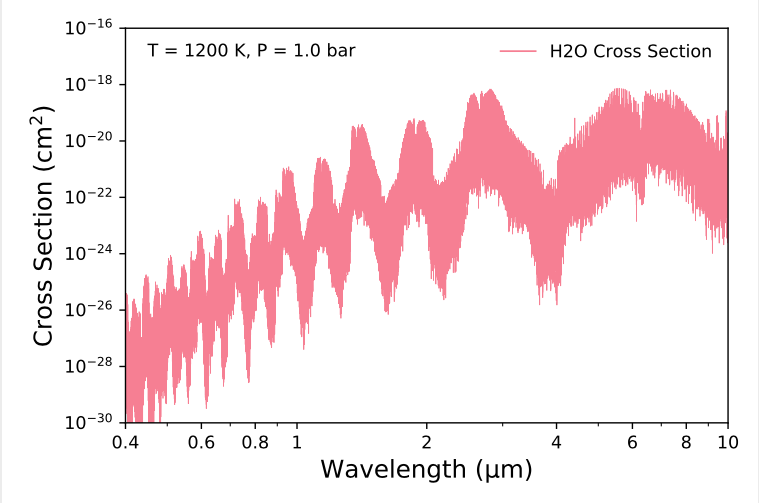